In [128]:
import matplotlib.pyplot as plt
import irinetcdf_02 as iri
import conductivity0_9_5 as cond
import read_netcdf_01 as rn   
import xarray as xr

In [130]:
filenameiri = "IRI.3D.2022001.nc"
with xr.open_dataset(filenameiri) as ds:
    print(ds.keys())
    
a = iri.irincdf(filenameiri)

KeysView(<xarray.Dataset>
Dimensions:  (time: 97, ht: 46, lat: 37, lon: 72)
Coordinates:
  * time     (time) timedelta64[ns] 00:00:00 00:15:00 ... 1 days 00:00:00
  * ht       (ht) float32 100.0 120.0 140.0 160.0 ... 940.0 960.0 980.0 1e+03
  * lat      (lat) float32 -90.0 -85.0 -80.0 -75.0 -70.0 ... 75.0 80.0 85.0 90.0
  * lon      (lon) float32 0.0 5.0 10.0 15.0 20.0 ... 340.0 345.0 350.0 355.0
Data variables:
    Ne       (time, ht, lat, lon) float32 ...
    O+       (time, ht, lat, lon) float32 ...
    H+       (time, ht, lat, lon) float32 ...
    He+      (time, ht, lat, lon) float32 ...
    O2+      (time, ht, lat, lon) float32 ...
    NO+      (time, ht, lat, lon) float32 ...
    N+       (time, ht, lat, lon) float32 ...
    Tn       (time, ht, lat, lon) float32 ...
    Ti       (time, ht, lat, lon) float32 ...
    Te       (time, ht, lat, lon) float32 ...
Attributes: (12/21)
    model_version:            IRI2020
    Rz12:                     40.7
    IG12:                     3

In [132]:
a.d.munit

{'Ne': {'long_name': 'Electron_Density', 'units': 'cm^-3'},
 'O+': {'long_name': 'Atomic_Oxygen_ion_density', 'units': 'cm^-3'},
 'H+': {'long_name': 'Atomic_Hydrogen_ion_density', 'units': 'cm^-3'},
 'He+': {'long_name': 'Atomic_Helium_ion_density', 'units': 'cm^-3'},
 'O2+': {'long_name': 'Molecular_Oxygen_ion_density', 'units': 'cm^-3'},
 'NO+': {'long_name': 'Nitric_Oxide_ion_density', 'units': 'cm^-3'},
 'N+': {'long_name': 'Atomic_Nitrogen_ion_density', 'units': 'cm^-3'},
 'Tn': {'long_name': 'Neutral_Temperature', 'units': 'K'},
 'Ti': {'long_name': 'Ion_Temperature', 'units': 'K'},
 'Te': {'long_name': 'Electron_Temperature', 'units': 'K'}}

In [134]:
a.d.data['Ne'].index.get_level_values('time').unique()
#a.d.data['Ne'].loc['0 days 00:00:00',:,:,:]

TimedeltaIndex(['0 days 00:00:00', '0 days 00:15:00', '0 days 00:30:00',
                '0 days 00:45:00', '0 days 01:00:00', '0 days 01:15:00',
                '0 days 01:30:00', '0 days 01:45:00', '0 days 02:00:00',
                '0 days 02:15:00', '0 days 02:30:00', '0 days 02:45:00',
                '0 days 03:00:00', '0 days 03:15:00', '0 days 03:30:00',
                '0 days 03:45:00', '0 days 04:00:00', '0 days 04:15:00',
                '0 days 04:30:00', '0 days 04:45:00', '0 days 05:00:00',
                '0 days 05:15:00', '0 days 05:30:00', '0 days 05:45:00',
                '0 days 06:00:00', '0 days 06:15:00', '0 days 06:30:00',
                '0 days 06:45:00', '0 days 07:00:00', '0 days 07:15:00',
                '0 days 07:30:00', '0 days 07:45:00', '0 days 08:00:00',
                '0 days 08:15:00', '0 days 08:30:00', '0 days 08:45:00',
                '0 days 09:00:00', '0 days 09:15:00', '0 days 09:30:00',
                '0 days 09:45:00', '0 days 10:00:00

In [136]:
cplot = cond.condiono_adachi()

C:\Users\User\Novo_CondIono_0_4\conductivity0_9_5.py:493: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


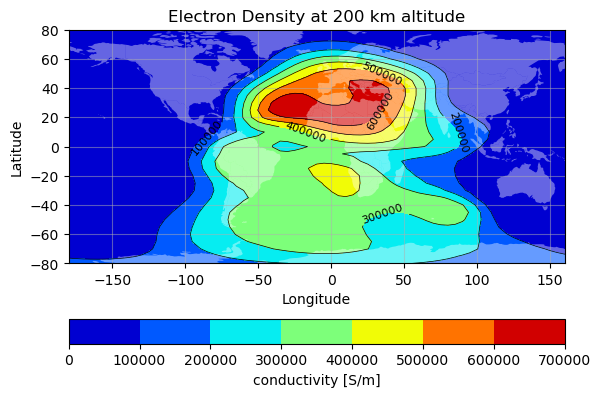

In [138]:
cplot.plot_2dgrid(a.d.data['Ne'].loc['0 days 00:00:00',:,:,:],200,'Electron Density at 200 km altitude')

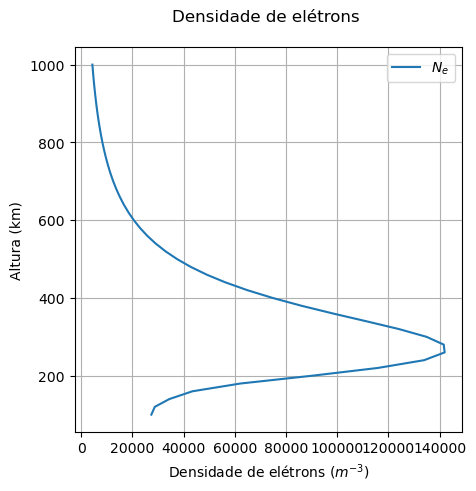

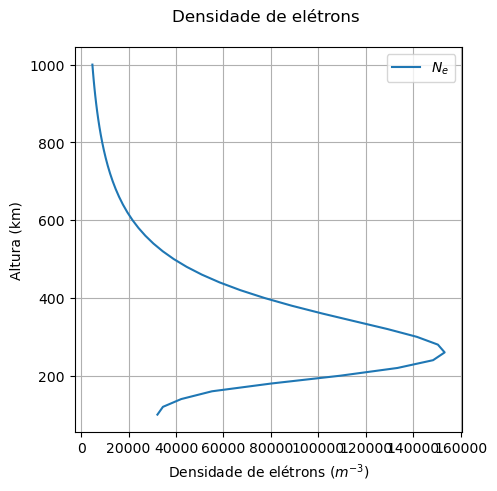

In [139]:
a.plot_densidade_e(a.d.data['Ne'].loc['0 days 00:00:00',:,-55,60],a.d.data['Ne'].index.get_level_values('ht').unique())
a.plot_densidade_e(a.d.data['Ne'].loc['0 days 00:15:00',:,-55,60],a.d.data['Ne'].index.get_level_values('ht').unique())

In [140]:
a.d.data['Ne'].index.get_level_values('ht').unique()

Index([ 100.0,  120.0,  140.0,  160.0,  180.0,  200.0,  220.0,  240.0,  260.0,
        280.0,  300.0,  320.0,  340.0,  360.0,  380.0,  400.0,  420.0,  440.0,
        460.0,  480.0,  500.0,  520.0,  540.0,  560.0,  580.0,  600.0,  620.0,
        640.0,  660.0,  680.0,  700.0,  720.0,  740.0,  760.0,  780.0,  800.0,
        820.0,  840.0,  860.0,  880.0,  900.0,  920.0,  940.0,  960.0,  980.0,
       1000.0],
      dtype='float32', name='ht')

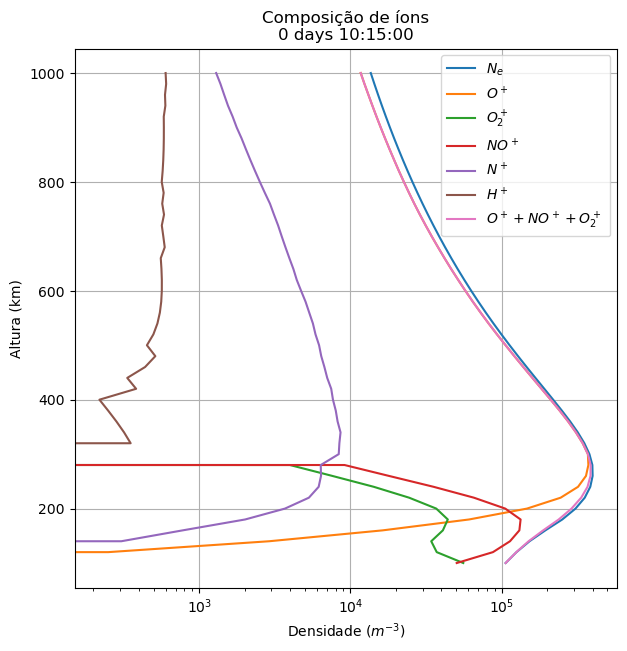

In [303]:

ht = a.d.data['Ne'].index.get_level_values('ht').unique()
lat = -55
lon = 60
time = '0 days 10:15:00'
plt.figure(figsize=(7,7))

plt.plot(a.d.data['Ne'].loc[time,:,lat,lon],ht,label = "$N_e$ ")
plt.plot(a.d.data['O+'].loc[time,:,lat,lon],ht,label = "$O^+$ ")
plt.plot(a.d.data['O2+'].loc[time,:,lat,lon],ht,label = "$O_2^+$ ")
plt.plot(a.d.data['NO+'].loc[time,:,lat,lon],ht,label = "$NO^+$ ")
plt.plot(a.d.data['N+'].loc[time,:,lat,lon],ht,label = "$N^+$ ")

plt.plot(a.d.data['H+'].loc[time,:,lat,lon],ht,label = "$H^+$ ")
plt.semilogx(a.d.data['O+'].loc[time,:,lat,lon] + a.d.data['NO+'].loc[time,:,lat,lon] + a.d.data['O2+'].loc[time,:,lat,lon] ,ht,label = "$O^+ + NO^+ + O_2^+$ ")


plt.xlabel("Densidade ($m^{-3}$)")
plt.ylabel("Altura (km)")
       
plt.title("Composição de íons\n"+str(time))
        
#plt.xlim(left=10e5)
plt.legend()
plt.grid()
        #$plt.xscale('log',base=10)
plt.show()

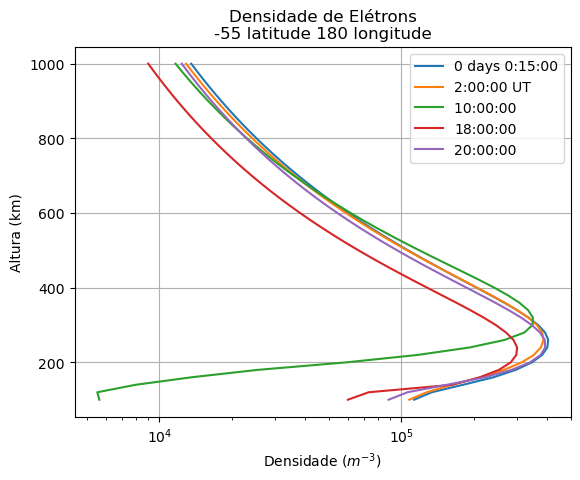

<Figure size 700x700 with 0 Axes>

In [289]:
ht = a.d.data['Ne'].index.get_level_values('ht').unique()
lat = -55
lon = 180
time = '0 days 0:15:00'

fig, ax = plt.subplots()
plt.figure(figsize=(7,7))

ax.plot(a.d.data['Ne'].loc[time,:,lat,lon],ht,label = time)
ax.plot(a.d.data['Ne'].loc['0 days 2:00:00',:,lat,lon],ht,label = "2:00:00 UT")
ax.plot(a.d.data['Ne'].loc['0 days 10:00:00',:,lat,lon],ht,label = "10:00:00 ")
ax.plot(a.d.data['Ne'].loc['0 days 18:00:00',:,lat,lon],ht,label = "18:00:00")
ax.semilogx(a.d.data['Ne'].loc['0 days 20:00:00',:,lat,lon],ht,label = "20:00:00")

ax.set_xlabel("Densidade ($m^{-3}$)")
ax.set_ylabel("Altura (km)")
       
ax.set_title("Densidade de Elétrons\n"+str(lat)+" latitude "+str(lon)+" longitude")
        
#plt.xlim(left=10e5)
ax.legend()
ax.grid()
        #$plt.xscale('log',base=10)
title="Densidade de eletron por horario -55 lat 180 lon"
fig.savefig("plot_" + title +'.png', dpi = 300, transparent=True)

## Temperatura

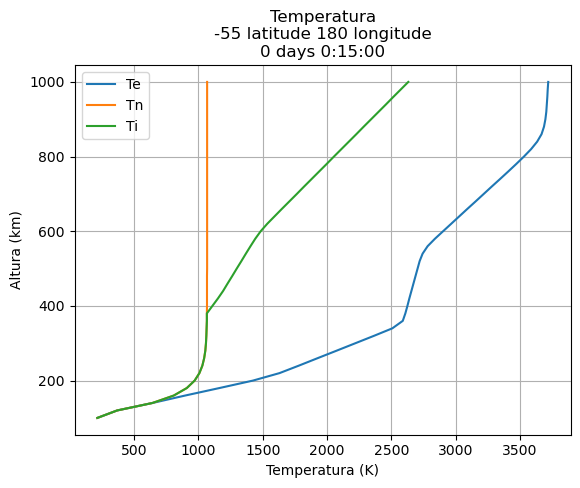

<Figure size 700x700 with 0 Axes>

In [199]:
ht = a.d.data['Ne'].index.get_level_values('ht').unique()
lat = -55
lon = 180
time = '0 days 0:15:00'

fig, ax = plt.subplots()
plt.figure(figsize=(7,7))

ax.plot(a.d.data['Te'].loc[time,:,lat,lon],ht,label = "Te")
ax.plot(a.d.data['Tn'].loc[time,:,lat,lon],ht,label = "Tn")
ax.plot(a.d.data['Ti'].loc[time,:,lat,lon],ht,label = "Ti")

ax.set_xlabel("Temperatura (K)")
ax.set_ylabel("Altura (km)")
       
ax.set_title("Temperatura\n"+str(lat)+" latitude "+str(lon)+" longitude\n"+str(time))
        
#plt.xlim(left=10e5)
ax.legend()
ax.grid()
        #$plt.xscale('log',base=10)
title="iri temperatura "+str(lat)+"lat "+str(lon)+"lon"
fig.savefig("plot_" + title +'.png', dpi = 300, transparent=True)

# NRLMSISE

In [152]:
import msise2Netcdf as msise

In [154]:
filename = "NRLMSIS2.0.3D.2008001.nc"
b = msise.nrlmsisenetcdf(filename)

In [170]:
b.msise.munit

{'O': {'long_name': 'O_Number_Density', 'units': 'CM-3 * 1e6'},
 'N2': {'long_name': 'N2_Number_Density', 'units': 'CM-3 * 1e6'},
 'O2': {'long_name': 'O2_Number_Density', 'units': 'CM-3 * 1e6'},
 'MASS': {'long_name': 'Total_Mass_Density', 'units': 'GM/CM3 * 1e6'},
 'NT': {'long_name': 'Temperature_at_Alt', 'units': 'K'},
 'ET': {'long_name': 'Exospheric_Temperature', 'units': 'K'},
 'He': {'long_name': 'He_Number_Density', 'units': 'CM-3 * 1e6'},
 'AR': {'long_name': 'Ar_Number_Density', 'units': 'CM-3 * 1e6'},
 'AO': {'long_name': 'Anomalous_Oxygen_Number_Density', 'units': 'CM-3 * 1e6'},
 'H': {'long_name': 'H_Number_Density', 'units': 'CM-3 * 1e6'},
 'N': {'long_name': 'N_Number_Density', 'units': 'CM-3 * 1e6'}}

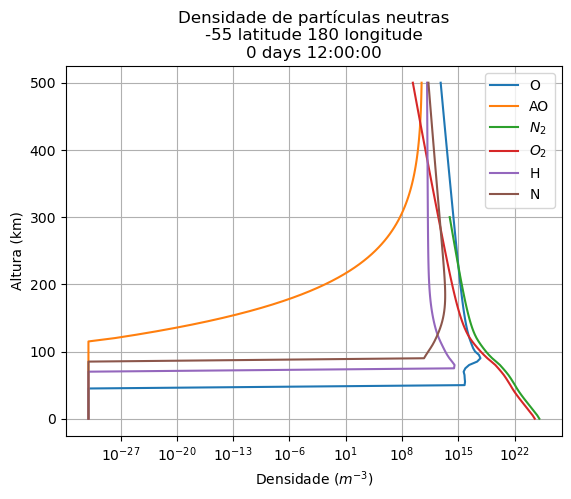

<Figure size 500x500 with 0 Axes>

In [257]:
ht = b.msise.data['O'].index.get_level_values('ht').unique()
lat = -55
lon = 180
time = '0 days 12:00:00'

fig, ax = plt.subplots()
plt.figure(figsize=(5,5))

ax.plot(b.msise.data['O'].loc[time,:,lat,lon],ht,label ="O")
ax.plot(b.msise.data['AO'].loc[time,:,lat,lon],ht,label ="AO")

#ax.plot(b.msise.data['N2'].loc[time,:300,lat,lon],ht[:61],label ="$N_2$")
ax.plot(b.msise.data['O2'].loc[time,:,lat,lon],ht,label ="$O_2$")
#ax.plot(b.msise.data['He'].loc[time,:,lat,lon],ht,label ="He")
ax.semilogx(b.msise.data['H'].loc[time,:,lat,lon],ht,label ="H")
ax.plot(b.msise.data['N'].loc[time,:,lat,lon],ht,label ="N")


ax.set_xlabel("Densidade ($m^{-3}$)")
ax.set_ylabel("Altura (km)")
       
ax.set_title("Densidade de partículas neutras\n"+str(lat)+" latitude "+str(lon)+" longitude\n"+str(time))
        
#plt.xlim(left=10e5)
ax.legend()
ax.grid()
        #$plt.xscale('log',base=10)
title="Densidade de eletron por horario -55 lat 180 lon"
fig.savefig("plot_" + title +'.png', dpi = 300, transparent=True)

In [203]:
b.msise.data['O'].loc[time,:,lat,lon]

ht
0.0      9.999000e-32
5.0      9.999000e-32
10.0     9.999000e-32
15.0     9.999000e-32
20.0     9.999000e-32
             ...     
480.0    9.004784e+12
485.0    8.238368e+12
490.0    7.538162e+12
495.0    6.898392e+12
500.0    6.313718e+12
Name: O, Length: 101, dtype: float64

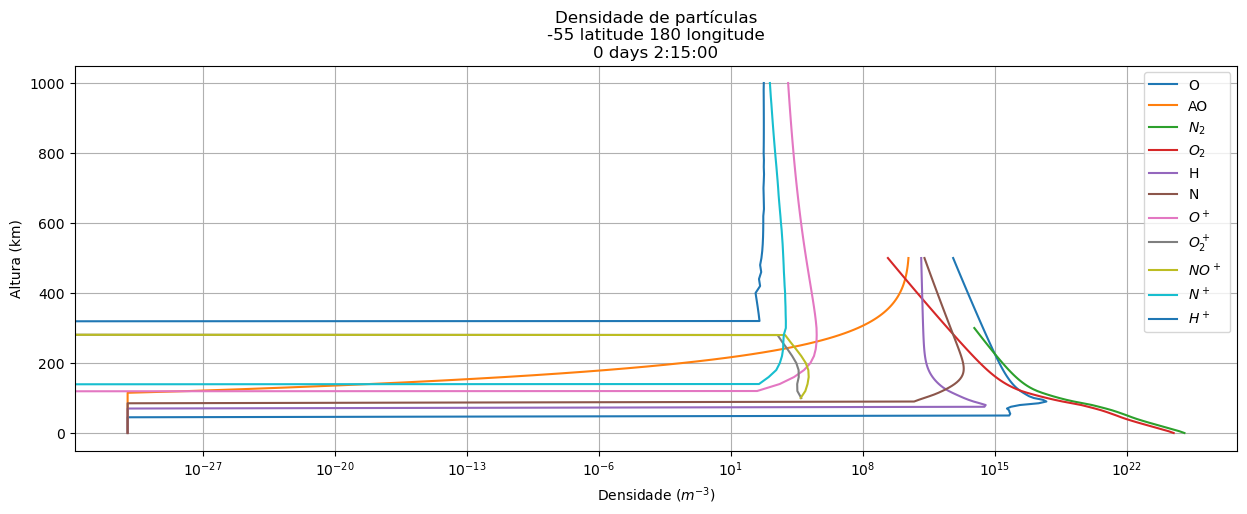

In [285]:
fig, ax = plt.subplots(figsize=(15,5))
ht = b.msise.data['O'].index.get_level_values('ht').unique().to_list()

ax.plot(b.msise.data['O'].loc[time,:,lat,lon],ht,label ="O")
ax.plot(b.msise.data['AO'].loc[time,:,lat,lon],ht,label ="AO")

ax.plot(b.msise.data['N2'].loc[time,:300,lat,lon],ht[:61],label ="$N_2$")
ax.plot(b.msise.data['O2'].loc[time,:,lat,lon],ht,label ="$O_2$")
#ax.plot(b.msise.data['He'].loc[time,:,lat,lon],ht,label ="He")
ax.semilogx(b.msise.data['H'].loc[time,:,lat,lon],ht,label ="H")
ax.plot(b.msise.data['N'].loc[time,:,lat,lon],ht,label ="N")

ht = a.d.data['Ne'].index.get_level_values('ht').unique()

#ax.plot(a.d.data['Ne'].loc[time,:,lat,lon],ht,label = "$N_e$ ")
ax.plot(a.d.data['O+'].loc[time,:,lat,lon],ht,label = "$O^+$ ")
ax.plot(a.d.data['O2+'].loc[time,:,lat,lon],ht,label = "$O_2^+$ ")
ax.plot(a.d.data['NO+'].loc[time,:,lat,lon],ht,label = "$NO^+$ ")
ax.plot(a.d.data['N+'].loc[time,:,lat,lon],ht,label = "$N^+$ ")

ax.semilogx(a.d.data['H+'].loc[time,:,lat,lon],ht,label = "$H^+$ ")
#ax.semilogx(a.d.data['O+'].loc[time,:,lat,lon] + a.d.data['NO+'].loc[time,:,lat,lon],ht,label = "$O^+ + NO^+$ ")

ax.set_xlabel("Densidade ($m^{-3}$)")
ax.set_ylabel("Altura (km)")
       
ax.set_title("Densidade de partículas\n"+str(lat)+" latitude "+str(lon)+" longitude\n"+str(time))
        
#plt.xlim(left=10e5)
ax.legend()
ax.grid()